# GPT4-V の APIの動作確認
pythonの環境等に慣れていない人用にcolabで確認できるように簡単に作成しました!!  
公開の仕方が誤っている・間違っている・エラーが出た・質問がある等なんでも気軽に送ってください!!

## 必要なライブラリのインストール

In [25]:
!pip install requests

ライブラリのimport

In [26]:
import base64

import requests
from PIL import Image
from io import BytesIO
import numpy as np

## 画像のupload
1. 以下のコードを実行
2. 実行後、「ファイルを選択」というボタンが出るので、クリックしてuploadする画像を選択

In [27]:
from google.colab import files
uploaded = files.upload()

Saving cat.png to cat (1).png


### uploadした画像の表示

画像サイズ:  (1024, 1024, 4)


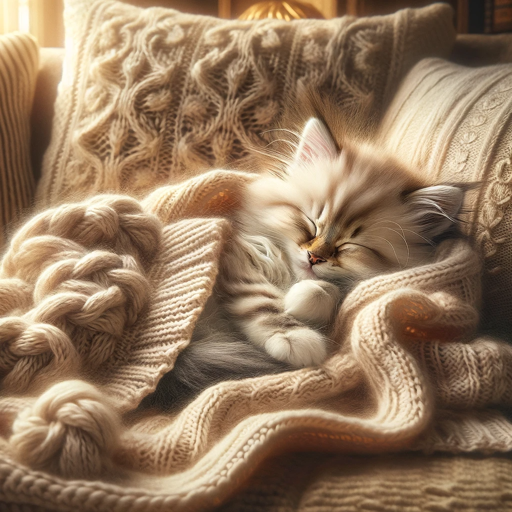

In [28]:
filename = list(uploaded.keys())[0]
image = Image.open(BytesIO(uploaded[filename]))

arr_image = np.asarray(image)
W, H, C = arr_image.shape
print("画像サイズ: ", arr_image.shape)

image.thumbnail((512, 512)) # エラーが出たらここをコメントアウトしてみてください
image

# GPT4-VのAPIを使用する

In [29]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

## API KEYの設定
右側の'your_api_key"の部分に自分のAPI KEYを入力する

In [30]:
API_KEY = "your_api_key"#@param{type:"string"}

### プロンプトの設定
右側(defalt: "What's in this image?")に好きなプロンプトを入力する

In [31]:
prompt = "What's in this image"#@param{type:"string"}

### APIを使用して出力を得る

In [32]:
base64_image = encode_image(filename)

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {API_KEY}"
}

payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": prompt,
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

### 受け取ったresponseを表示
errorの確認ができるので表示させています

In [33]:
print(response.json())

{'id': 'chatcmpl-8JJg7dEVqZBA4nSndrxc8G1rtusCx', 'object': 'chat.completion', 'created': 1699614567, 'model': 'gpt-4-1106-vision-preview', 'usage': {'prompt_tokens': 777, 'completion_tokens': 68, 'total_tokens': 845}, 'choices': [{'message': {'role': 'assistant', 'content': 'This image features a long-haired cat comfortably nestled among soft, knitted blankets or throws. The cat appears to be sleeping peacefully, and the sunlight filters through, highlighting its fluffy fur and the intricate patterns of the knitwear. The warm tones of the image suggest a cozy, serene environment, possibly in a home setting during a sunny day.'}, 'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'}, 'index': 0}]}


## 出力を確認

In [34]:
print(response.json()['choices'][0]['message']['content'])

This image features a long-haired cat comfortably nestled among soft, knitted blankets or throws. The cat appears to be sleeping peacefully, and the sunlight filters through, highlighting its fluffy fur and the intricate patterns of the knitwear. The warm tones of the image suggest a cozy, serene environment, possibly in a home setting during a sunny day.
